In [45]:
from skimage import io, color, filters, morphology, util
from skimage.morphology import disk, dilation, erosion, white_tophat, black_tophat, closing, opening
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import binary_hit_or_miss
fingerprint =color.rgb2gray(io.imread('https://raw.githubusercontent.com/nmhlog/SarimiIsidua/main/lab03/Tugas%20Lab%203%20-%20Images/Tugas%20Lab%203%20-%20Images/noisy_fingerprint.jpg'))


## 1. Noise Filter
### a.Bersihkan noise pada gambar di atas menggunakan morphology operator!

<function matplotlib.pyplot.imshow>

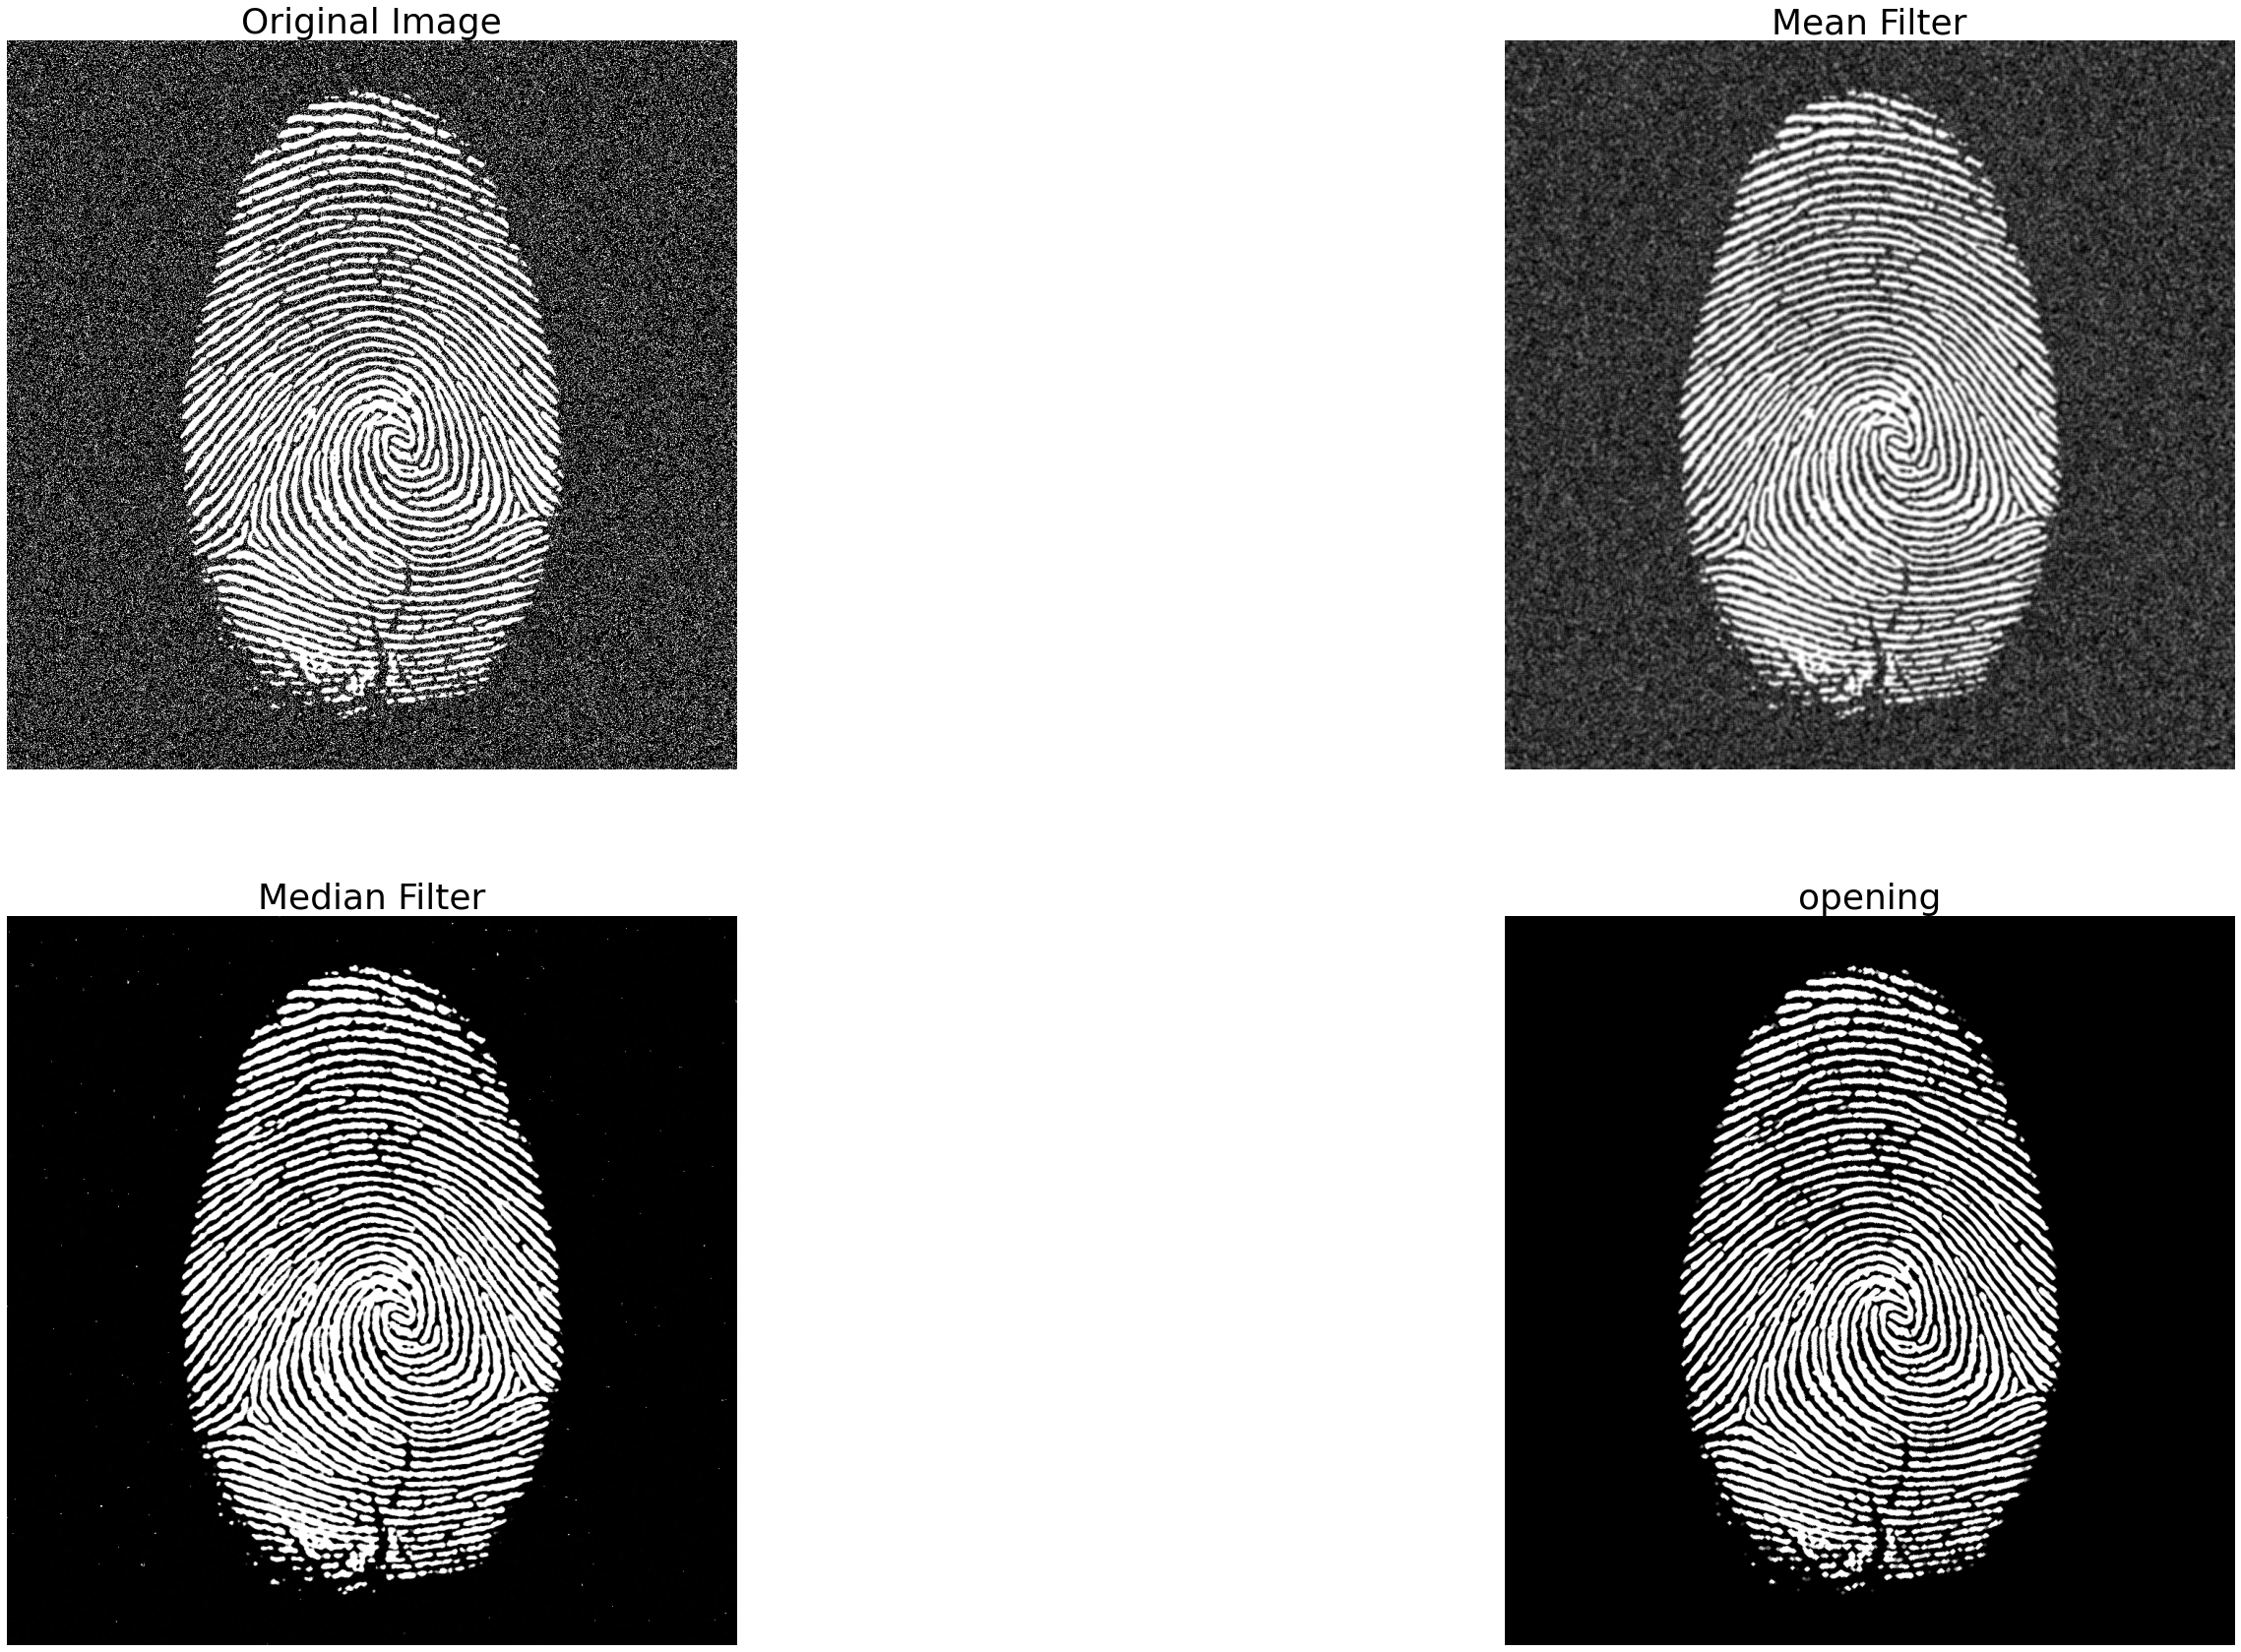

In [46]:
mean_filters = filters.rank.mean(fingerprint, selem=morphology.square(5))
median_filters = filters.rank.median(fingerprint, selem=morphology.square(5))
selem = disk(2)
dilated = dilation(fingerprint, selem)
open = opening(fingerprint, selem)
closed_after_opening =closing(open, selem)

# showing the image
plt.figure(figsize=(50,30))
plt.rcParams['font.size'] = 30
plt.subplot(2,2,1); plt.title('Original Image'); plt.imshow(fingerprint, cmap='gray'); plt.axis('off')
plt.subplot(2,2,2); plt.title('Mean Filter'); plt.imshow(mean_filters, cmap='gray'); plt.axis('off')
plt.subplot(2,2,3); plt.title('Median Filter'); plt.imshow(median_filters, cmap='gray'); plt.axis('off')
plt.subplot(2,2,4); plt.title('opening'); plt.imshow(open, cmap='gray'); plt.axis('off')
plt.imshow


## b. Ceritakan mengapa Anda mengerjakan poin a dengan cara tersebut?

Setelah dilakukan pecobaan beberapa kali dengan cara yang berbeda akhirnya kami menentukan metode opening yang terbaik, hal ini didasari oleh:

```
Opening adalah proses erosi yang diikuti dengan dilasi.
Dimulai dengan melakukan erosi pada citra kemudian hasil tersebut kembali dilakukan erosi. 
Opening biasanya digunakan untuk menghilangkan objek-objek kecil dan 
kurus serta dapat membuat tepi citra lebih smooth (untuk citra berukuran besar).
``` 
source :[devtrik](https://devtrik.com/opencv/operasi-morfologi-pada-pengolahan-citra/)

sehingga pada proses erotion dengan mengunakan disk kami dapat menghilangkan noise yang berbentuk titik, lalu setelah gambar titik tersebut menghilang kami perbesar gambar tersebut mengunakan dilation dengan disk dimana dengan menggunakan ukuran yang kecil untuk meminimalisir gambar berubah (apabila disk lebih dari 3 maka citra putih banyak hilang) dan diperolehlah gambar yang diingikan.

### c. Sebelumnya Anda pernah melakukan penghilangan noise dengan menggunakan median dan mean filter di lab 1. Apa perbedaannya dengan penghilangan noise di lab 3 ini?

Perbedaan antara image filtering dalam hal ini mean dan median filter dengan morphological image processing ialah, apabila pada mean dan median filter menggunakan kernel dengan ukuran tertentu dan juga mempertimbangkan intensitas piksel dalam brotherhoodnya. sedangkan pada morphological image processing menggunakan structuring elemen. 
akibat perbedaan tersebut, mean dan median filter memperhatikan intensitas dari gambar (0-255) sedangkan pada morphological tidak memperhatikan hal tersebut karena nilainya mutlak yang diperhatikan hanya 0 dan 1. jadi pada mean dan median filter ada intensitas antara gelap dan terang. apda morphological hanya ada dua pilihan hitam ataupun putih (biner) 

## 2. Pesan rahasia
Anda mendapat pesan rahasia yang terdiri dari dua citra. Untuk dapat membaca pesan ini, Anda harus menerapkan morphological image processing pada masing-masing citra, kemudian menggabungkannya menjadi satu. Berikut petunjuknya.

In [47]:
path1 = "https://raw.githubusercontent.com/nmhlog/SarimiIsidua/main/lab03/Tugas%20Lab%203%20-%20Images/Tugas%20Lab%203%20-%20Images/secret11.jpg"
path2 = "https://raw.githubusercontent.com/nmhlog/SarimiIsidua/main/lab03/Tugas%20Lab%203%20-%20Images/Tugas%20Lab%203%20-%20Images/secret2.jpg"

In [48]:
# Image GRAY initialization
secret11_img = color.rgb2gray(io.imread(path1))
secret2_img = color.rgb2gray(io.imread(path2))

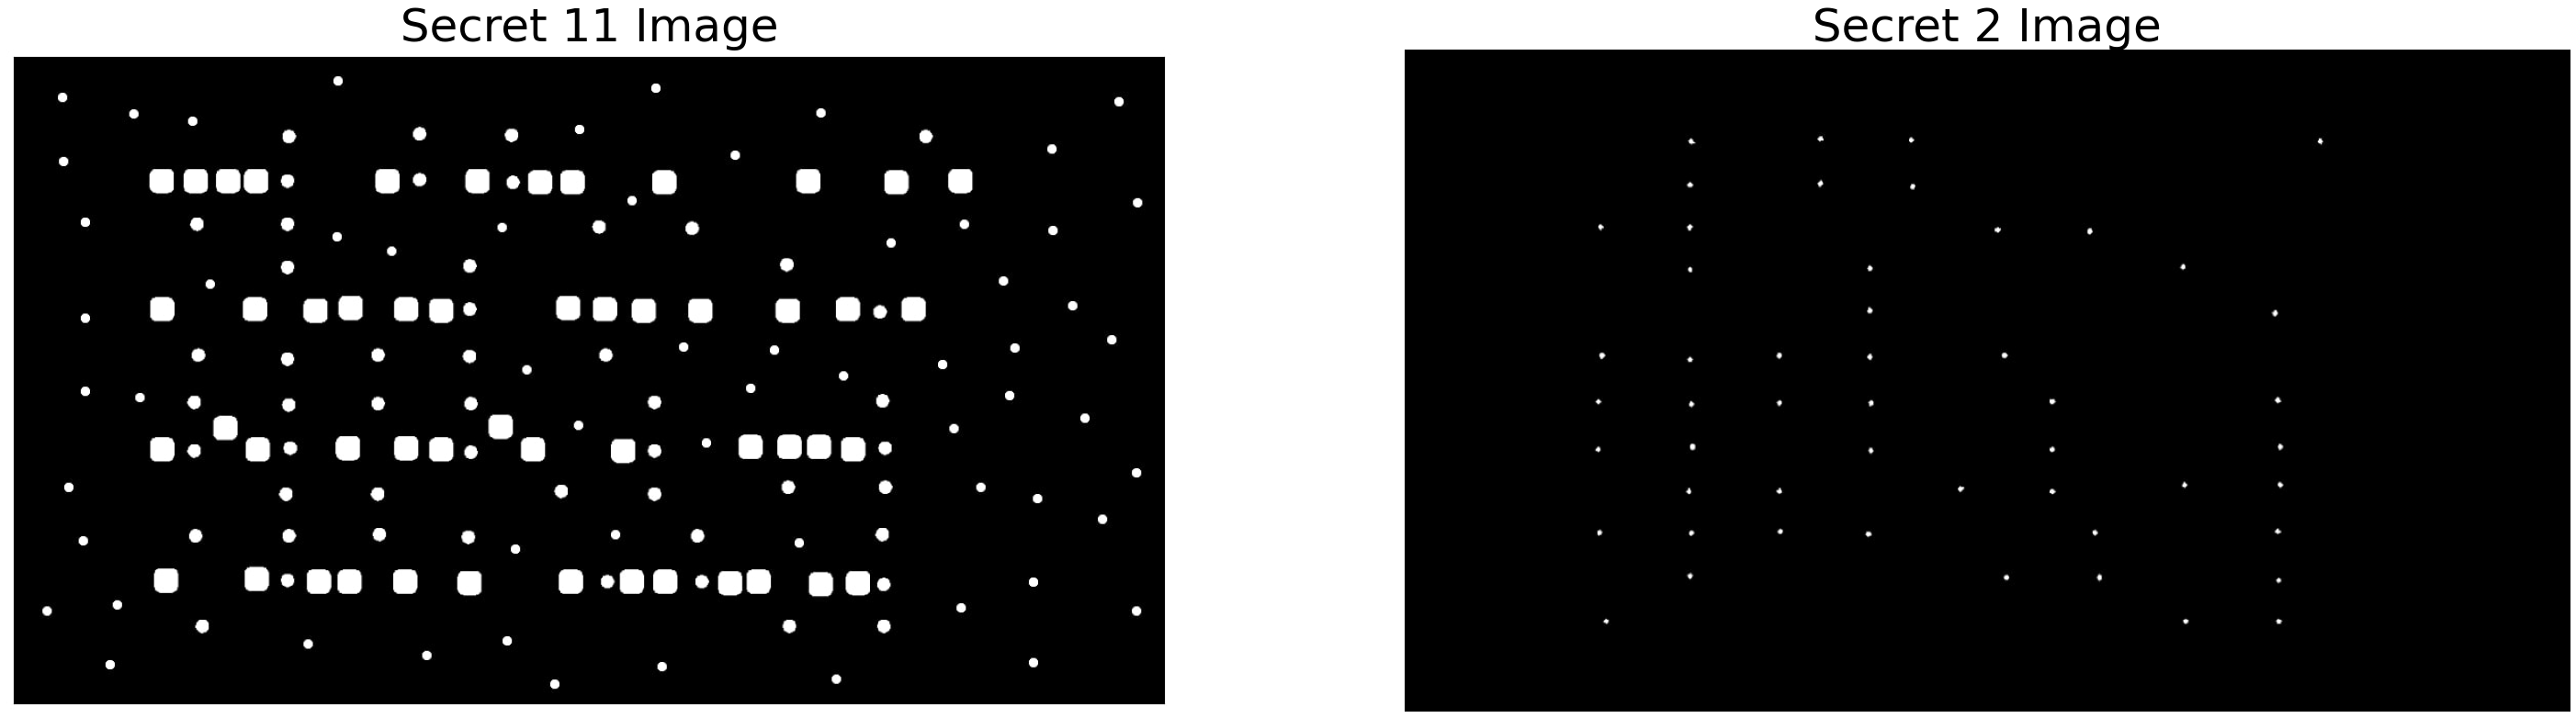

In [49]:
fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(50, 20))
axes[0].imshow(secret11_img,cmap="gray")
axes[0].axis('off')
axes[0].set_title(" Secret 11 Image ",size=50)
axes[1].imshow(secret2_img,cmap="gray")
axes[1].axis('off')
axes[1].set_title(" Secret 2 Image ",size=50)
plt.show()

###a. Lakukan operasi hit or miss dengan kernel rectangle berukuran 18x18 terhadap citra secret11 untuk mendapatkan citra secret1. Hint: Anda bisa menggunakan library binary_hit_or_miss dari scipy.

Text(0.5, 1.0, ' after hit and miss, secret 1 ')

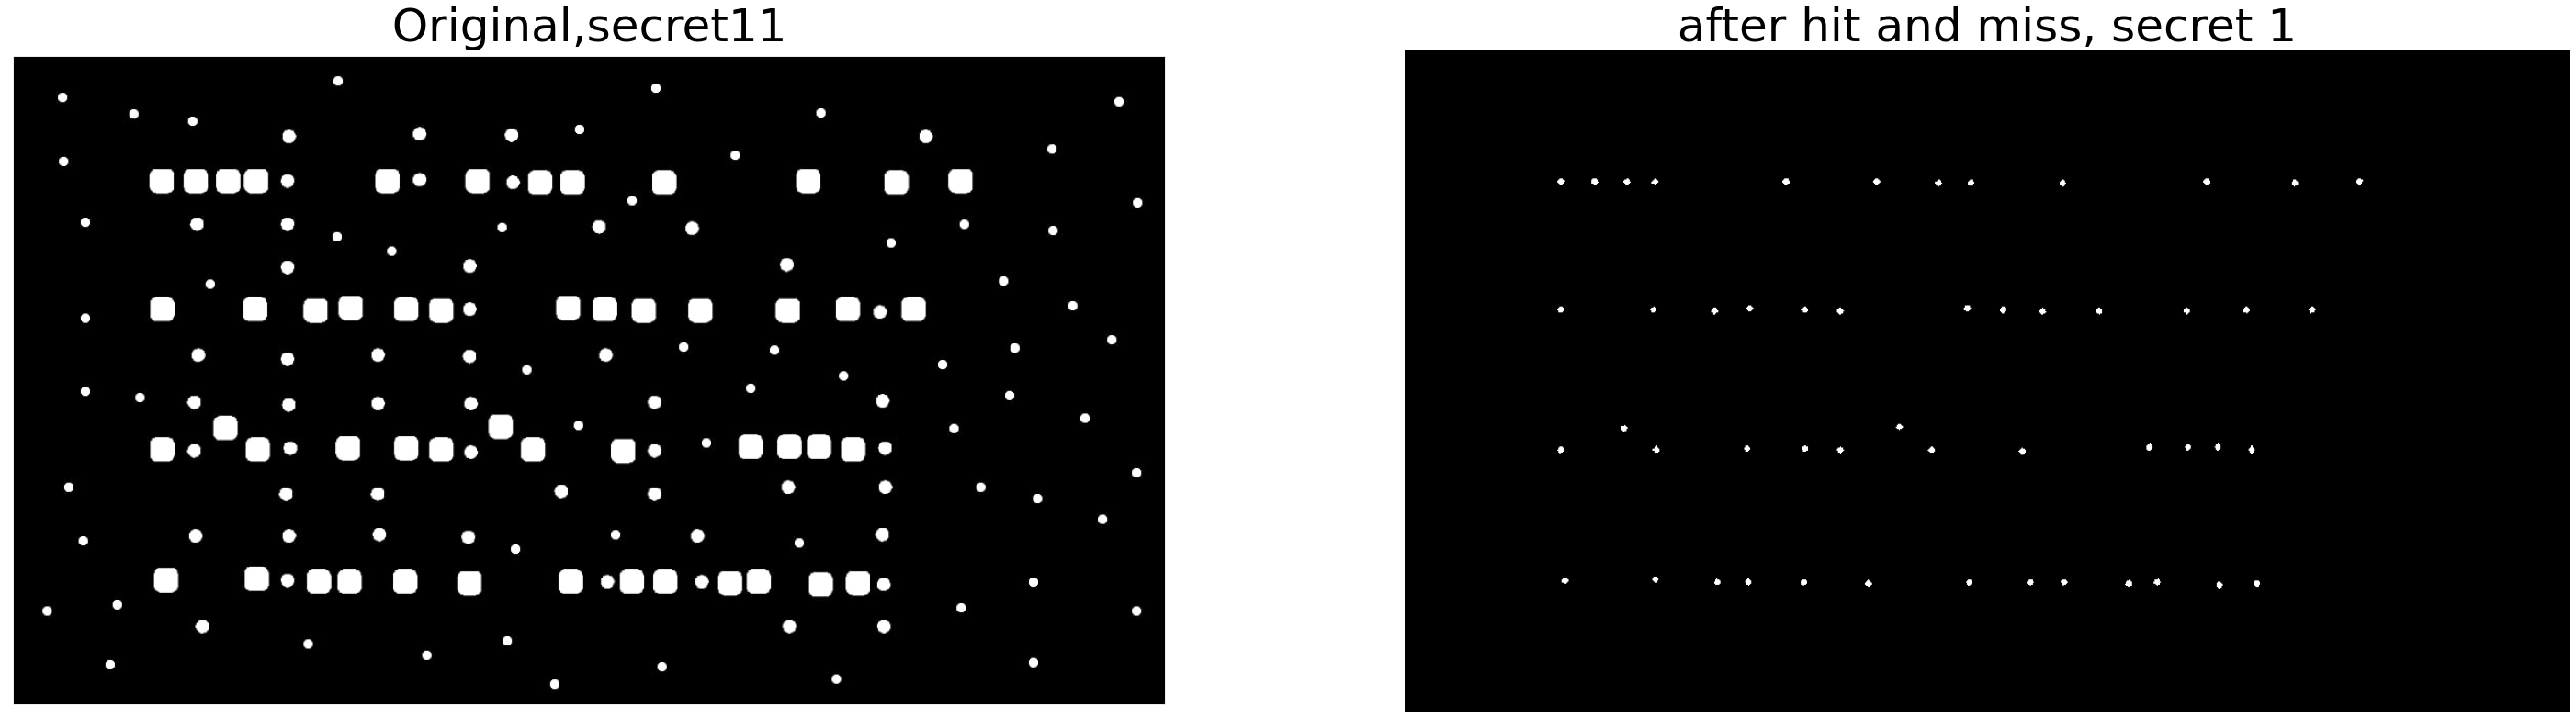

In [50]:
se_secret11 = morphology.rectangle(18,18)
secret1_img= binary_hit_or_miss(secret11_img, structure1=se_secret11).astype(np.int)
fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(50, 20))
axes[0].imshow(secret11_img,cmap="gray")
axes[0].axis('off')
axes[0].set_title(" Original,secret11 ",size=50)
axes[1].imshow(secret1_img,cmap="gray")
axes[1].axis('off')
axes[1].set_title(" after hit and miss, secret 1 ",size=50)



### b. Lakukan dilatasi terhadap citra secret1 dan secret2 dengan kernel yang tepat.
####Hanya ada satu pasang kernel yang benar untuk membuka pesan rahasia. Berikut
####adalah pilihan kernel yang bisa Anda coba:
####● {diamond(25), diamond(15)}
####● {rectangle(70,10), rectangle(10,70)}
####● {rectangle(10,70), star(10)}
####Format: {kernel citra secret1, kernel citra secret2}
<br><br><br>
###**Jawaban :** <br>
####Setelah melakukan percobaan akhirnya dipilih format:<br>
####{rectangle(70,10), rectangle(10,70)}


Text(0.5, 1.0, ' After Dilated,secret 2 ')

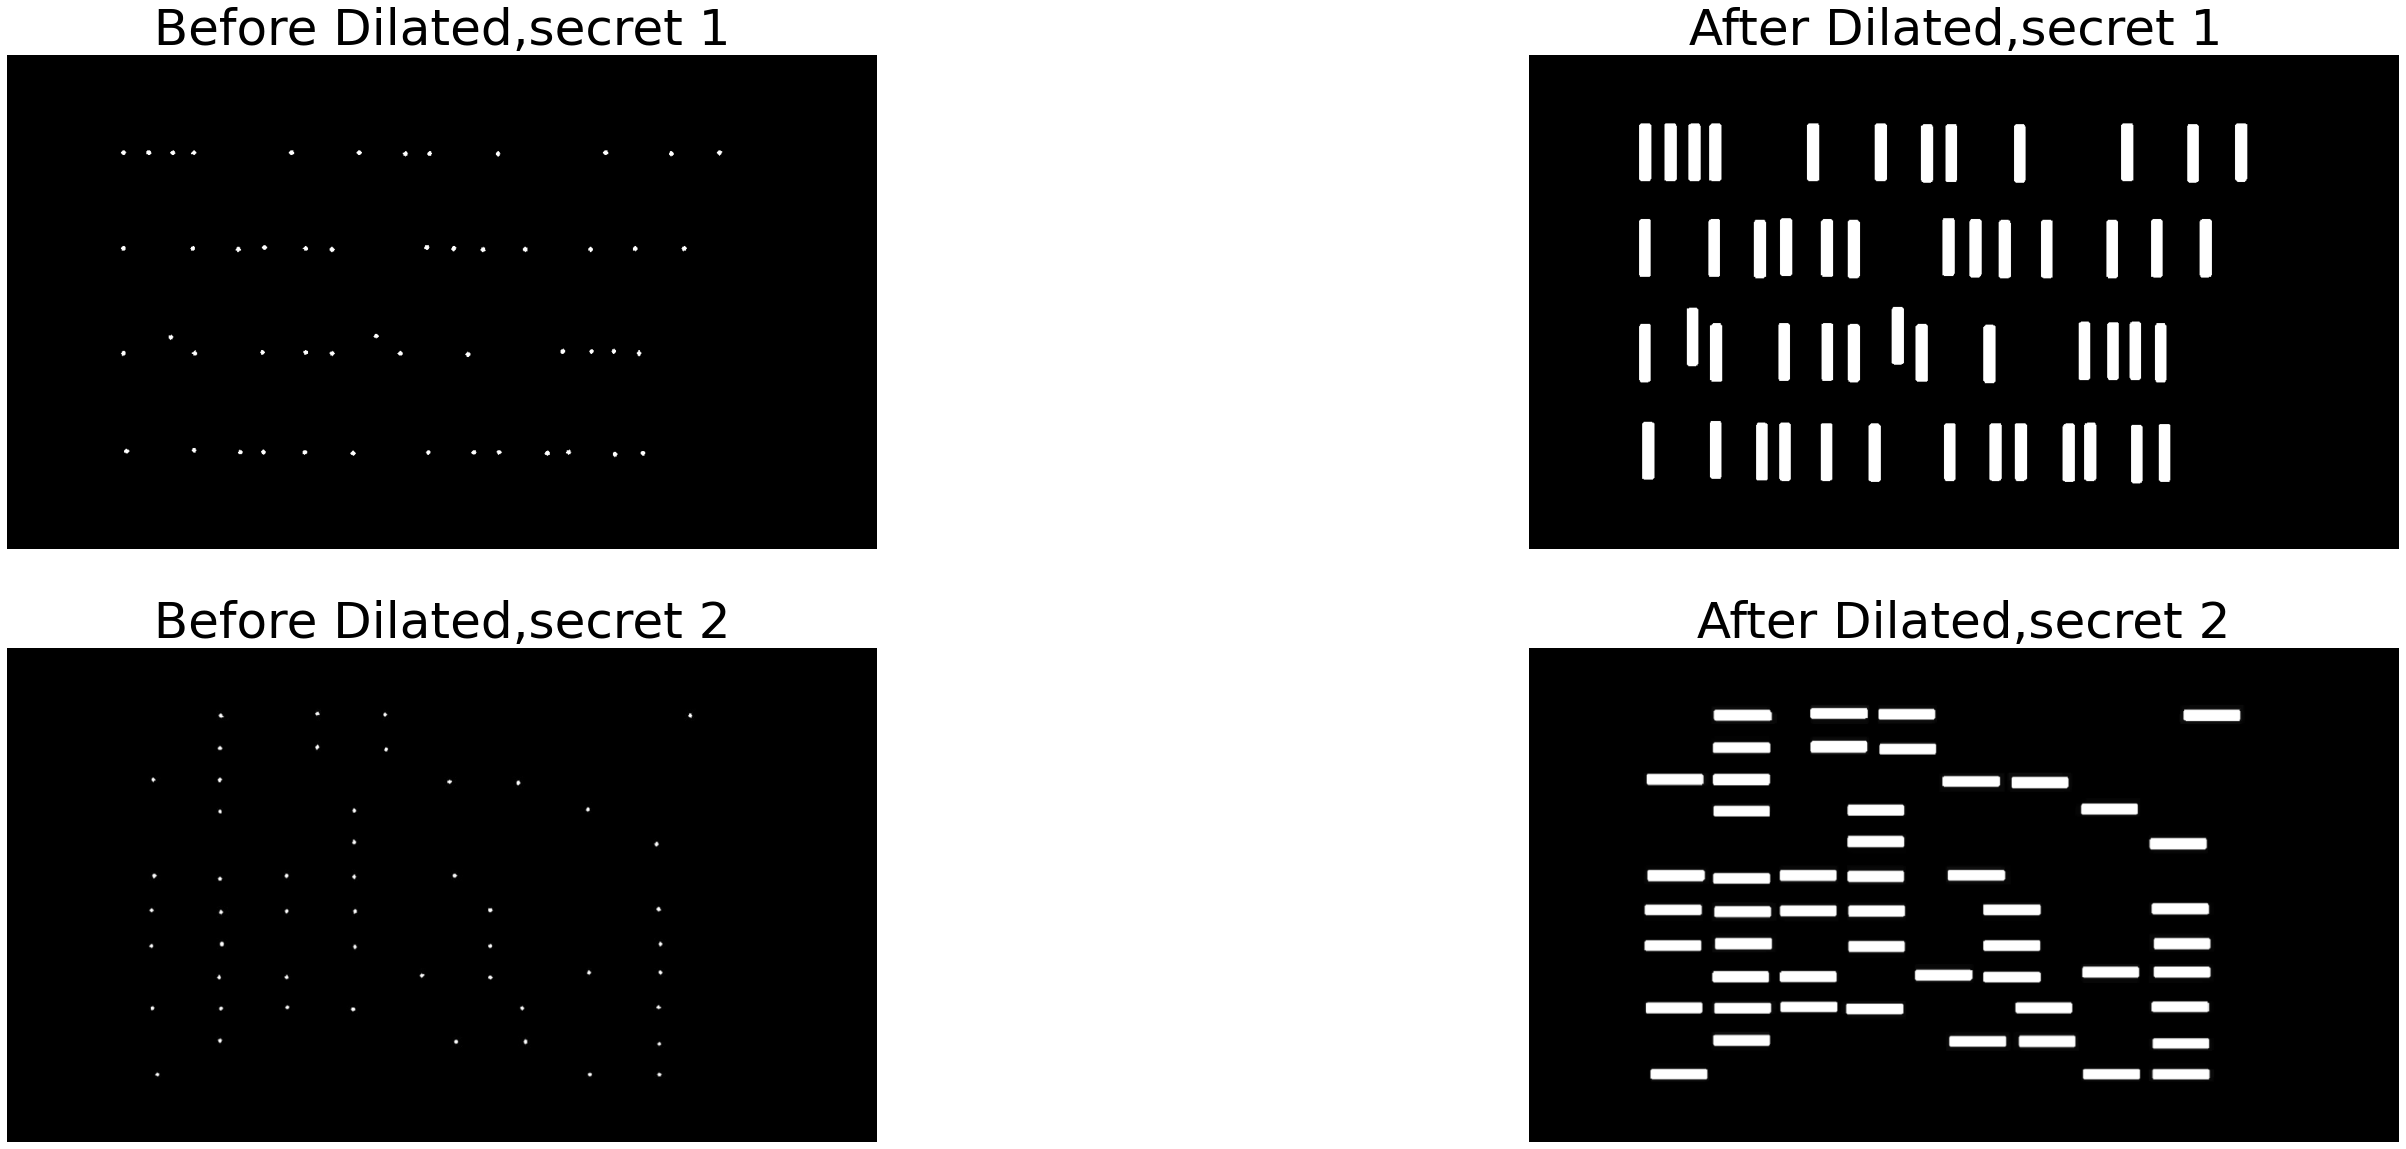

In [51]:
#Se Initialization
se_secret1_rectangle7010,se_secret2_rectangle1070 = morphology.rectangle(70,10), morphology.rectangle(10,70)
dilated_secret1_img = morphology.dilation(secret1_img, se_secret1_rectangle7010)
dilated_secret2_img = morphology.dilation(secret2_img, se_secret2_rectangle1070)

fig,axes=plt.subplots(ncols=2,nrows=2,figsize=(50, 20))
axes[0][0].imshow(secret1_img,cmap="gray")
axes[0][0].axis('off')
axes[0][0].set_title(" Before Dilated,secret 1 ",size=50)
axes[0][1].imshow(dilated_secret1_img,cmap="gray")
axes[0][1].axis('off')
axes[0][1].set_title(" After Dilated,secret 1  ",size=50)
axes[1][0].imshow(secret2_img,cmap="gray")
axes[1][0].axis('off')
axes[1][0].set_title(" Before Dilated,secret 2 ",size=50)
axes[1][1].imshow(dilated_secret2_img,cmap="gray")
axes[1][1].axis('off')
axes[1][1].set_title(" After Dilated,secret 2 ",size=50)

###c. Gabungkan kedua citra hasil dilatasi poin b! Jika kernel yang Anda pilih benar, pesan rahasia akan terlihat.

(-0.5, 1129.5, 641.5, -0.5)

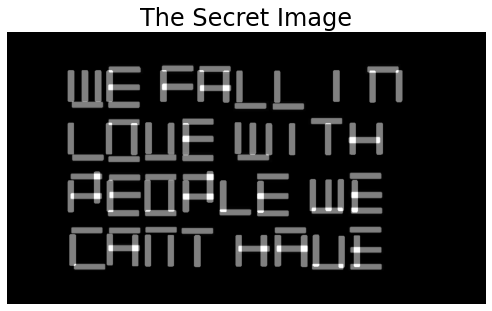

In [52]:
# Adding To image
secret_image = dilated_secret1_img+dilated_secret2_img
plt.rcParams['font.size'] = 20
plt.figure(figsize=(10,5))
plt.imshow(secret_image,cmap='gray')
plt.title("The Secret Image")
plt.axis('off')


###d. *Tuliskan* pesan rahasia yang Anda dapatkan!

# WE FALL IN LOVE WITH PEOPLE WE CANT HAVE


